
#PyTorch Basics: Deep Learning & Data Analysis

**Over the next few weeks we will learn the basics of Deep Learning using pytorch**

Do the coding exercises below, add comments and markdown explanations, and upload the resulting notebook together with the collab corresponding to mini project 2.

This notebook covers:

1. Problem setup & data splits (train/val/test)  
2. PyTorch tensors, datasets, and dataloaders  
3. Models: linear regression, MLP for classification, CNN
4. Losses, regularization (L2/weight decay & dropout), and metrics  
5. Optimization: gradient descent w/ `torch.optim`   
6. Experiment tracking: random seeds, reproducibility, and plotting learning curves  

> This notebook uses only standard libraries available in Colab: `torch`, `numpy`, `matplotlib`, and the `sklearn` library for toy data.


In [82]:
#@title Imports & reproducibility helpers
import math, random, os, time
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from typing import Tuple, Dict, Any

try:
    from sklearn.datasets import make_moons, make_circles
    _HAS_SKLEARN = True
except Exception as e:
    print("scikit-learn not found; synthetic dataset generators will fall back to torch-only.")
    _HAS_SKLEARN = False

import matplotlib.pyplot as plt

def set_seed(seed: int = 123):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(7)
DEVICE


'cpu'

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

##-1) Tensors

Tensors in pytorch are very similar to numpy arrays

1. 🧩 How do we construct a tensor?

Say we want to construct the following tensor using torch functions:

```python
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

2. 🧩 What's the size of this tensor?


##Anwser 🧩

This is a 3x3 tensor --> anwser that arises just by looking at the matrix

In [83]:
#check anwser above with code (template provided by professor below)

ex_tensor = torch.tensor([[0, 3, 6], #create a variable for the tensor
                          [1, 4, 7],
                          [2, 5, 8]])
print (ex_tensor) #print the tensor to see its shape

ex_tensor.shape #output the size of the tensor directly using pytorch

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])


torch.Size([3, 3])

In [84]:
#@title Answer 1 - example from professor for another tensor
my_tensor = torch.tensor([[0, 1, 2],
                          [3, 4, 5],
                          [6, 7, 8]])

print(my_tensor)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [85]:
#@title Answer 2 - example from professor for another tensor
my_tensor.shape

torch.Size([3, 3])

In [86]:
#@title Pytorch has many useful functions for creating, indexing and operating with tensor
# Parameters
sequence = torch.arange(5)   # [0, 1, 2, 3, 4]
repeats = 3                  # number of times to repeat

#Construct the repeated tensor
x = sequence.repeat(repeats)

print(sequence), print(x)

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])


(None, None)

In [87]:
#@title 🧩 Print a tensor of size (5,3), where all the values have one fixed size
torch.full((5,3), -2.0)

tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.]])

###🧩 Construct* the following tensor:

```python
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

##Anwser 🧩

In [88]:
tensor = torch.arange(5).repeat(3,1)
print(tensor)

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


At some point in my code, I need to write an equation that uses 2 * pi.
I get an error allerting  me that my code returns a float where a tensor is expected. What is the type of

```python
type(2*torch.py)
```
and how do I turn into a tensor?


##Anwser 🧩

In [89]:
tensor = torch.tensor(2 * torch.pi)
print(tensor)

tensor(6.2832)


In [90]:
#@title 🧩 Use pytorch functions to generate this matrix

n = 4
A = torch.eye(n)                         # diagonal of 1s
A += torch.diag(torch.full((n-1,), -2.), diagonal=-1)  # sub-diagonal
A += torch.diag(torch.full((n-1,), -2.), diagonal=1)   # super-diagonal

print(A)

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


##Anwser 🧩

In [91]:
tensor = torch.eye(4) - 2*torch.diag(torch.ones(3), diagonal=1) - 2*torch.diag(torch.ones(3), diagonal=-1)
print(tensor)

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 0) Broadcasting, Indexing, and Distributions in PyTorch

**Goal:** Practice *broadcasting*, *masking*, and *distributions* in PyTorch through short guided exercises.

Run each code cell, fill in the `# TODO` parts, and test your answers.


In [92]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
torch.manual_seed(0)



## Broadcasting and Fancy Indexing

Broadcasting and indexing make PyTorch efficient and expressive.



### 🧩 Exercise 0.1  
Construct a tensor `X` where `X[i,j] = 2*i + j` using broadcasting.  

**Example Output:**
```
tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])
```


In [93]:
# TODO: Construct X using broadcasting
i = torch.arange(3).view(-1, 1) # [[0], [1], [2]]
j = torch.arange(4).view(1, -1) # [[0, 1, 2, 3]]
X = 2*i+j

print(X)

tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])


### 🧩 Exercise 0.2  
Compute a **distance matrix** `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`.  

Use broadcasting (no loops).


In [94]:
#Create a 6x2 tensor with values from 0 to 11
X = torch.arange(12, dtype=float).reshape(6, 2)

#Compute pairwise differences using broadcasting
diff = X[:, None, :] - X[None, :, :]   # shape (6, 6, 2)

#Compute Euclidean distance
D = torch.sqrt(torch.sum(diff**2, dim=2))

print(D)

tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137, 14.1421],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [14.1421, 11.3137,  8.4853,  5.6569,  2.8284,  0.0000]],
       dtype=torch.float64)



### 🧩 Exercise 0.3  
Extract the submatrix of rows `[1,4]` and columns `[0,2,3]` of  
`A = torch.arange(36).reshape(6, 6)`

**Expected Output:**
```
tensor([[ 6,  8,  9],
        [24, 26, 27]])
```


In [95]:
#Create a 6x6 tensor with values 0 to 35
A = torch.arange(36).reshape(6, 6)

#Define row and column indices as tensors
rows = torch.tensor([1, 4])
cols = torch.tensor([0, 2, 3])

#extract submatrix
subA = A[rows[:, None], cols]

print(subA)

tensor([[ 6,  8,  9],
        [24, 26, 27]])



### 🧩 Exercise 0.4  
Create a **boolean mask** `M` where `M[i,j]` is True iff `A[i,j]` is divisible by 5 or 7.


In [96]:
#6x6 tensor with values 0 to 35
A = torch.arange(36).reshape(6, 6)

#boolean mask M
M = (A % 5 == 0) | (A % 7 == 0)

#print the boolean mask
print(M)

tensor([[ True, False, False, False, False,  True],
        [False,  True, False, False,  True, False],
        [False, False,  True,  True, False, False],
        [False, False,  True,  True, False, False],
        [False,  True, False, False,  True, False],
        [ True, False, False, False, False,  True]])



### 🧩 Exercise 0.5  
Using the mask `M`, add 10 to elements of `A` that are divisible by 5 or 7 (in-place).


In [97]:
A = torch.arange(36).reshape(6, 6) #rewrite this code to fix A
M = (A % 5 == 0) | (A % 7 == 0)
A[M] += 10 #add 10 to elements that fullfill M

print(A)

tensor([[10,  1,  2,  3,  4, 15],
        [ 6, 17,  8,  9, 20, 11],
        [12, 13, 24, 25, 16, 17],
        [18, 19, 30, 31, 22, 23],
        [24, 35, 26, 27, 38, 29],
        [40, 31, 32, 33, 34, 45]])



## Distributions

`torch.distributions` provides a clean API for probability distributions and supports broadcasting.



### 🧩 Exercise 0.6  
Draw **100 samples** from a Poisson distribution with rate λ = 4.5.


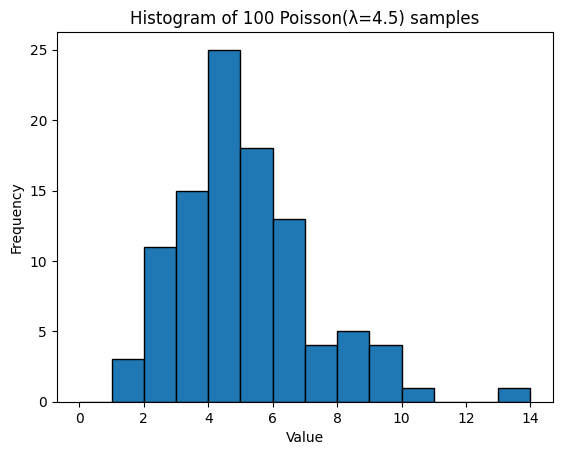

In [98]:
#set seed for reproducibility
torch.manual_seed(30)

#Poisson distribution with rate λ=4.5
dist = torch.distributions.Poisson(4.5)

#100 samples
samples = dist.sample((100,))

#plot histogram
plt.hist(samples.numpy(), bins=range(0, 15), edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of 100 Poisson(λ=4.5) samples")
plt.show()


### 🧩 🧩 Exercise 0.7  
Construct a matrix `P` where  
`P[i,j] = exp(-λ[i]) * λ[i]^j / j!`  
for λ = `torch.arange(1.,6.)` and j = `torch.arange(5.)`.


In [99]:

#define lambda vector with shape (5,1) (broadcast over columns)
lam = torch.arange(1., 6.).view(-1, 1)  #shape (5,1)
# define j with shape (1,5) (broadcast over rows)
j = torch.arange(5.).view(1, -1)        #shape (1,5)

#compute factorial
factorial = torch.exp(torch.lgamma(j + 1))  #shape (1,5)(broadcast over rows)

# compute P[i,j]
P = torch.exp(-lam) * lam**j / factorial  # shape (5,5)

print(P)

tensor([[0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954],
        [0.0067, 0.0337, 0.0842, 0.1404, 0.1755]])



### 🧩 🧩 Exercise 0.8
Evaluate the **log-probability** of `[0.5, 2.0, 5.0]`  
under a Gamma distribution with shape=3.0, rate=2.0.


In [100]:

from torch.distributions import Gamma

#define gamma distribution
g = Gamma(concentration=3.0, rate=2.0)

#evaluate log-probabilities at given points
logp = g.log_prob(torch.tensor([0.5, 2.0, 5.0]))

print(logp)


tensor([-1.0000, -1.2274, -5.3948])



### 🧩 Problem 0.9  
Draw **1000 samples** from a mixture of two Poisson distributions  
with rates 2 and 7, equal weights (0.5, 0.5).  
Plot a normalized histogram.


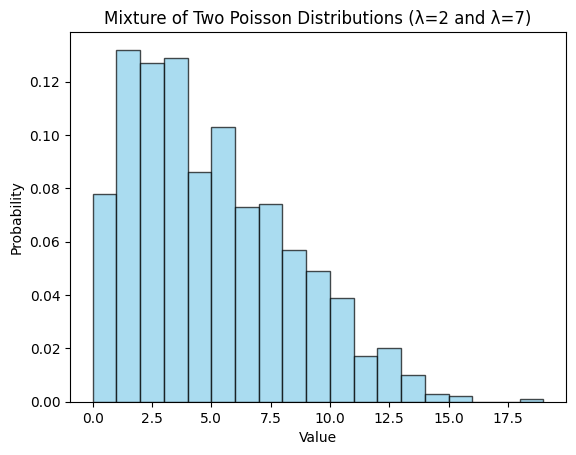

In [101]:
import torch
from torch.distributions import Poisson
import matplotlib.pyplot as plt

#set seed for reproducibility
torch.manual_seed(30)

#number of samples
N = 1000

#draw mixture assignments: 0 to rate 2, 1 to rate 7
z = torch.bernoulli(torch.full((N,), 0.5))  # 0.5 probability for each component

#choose lambda based on mixture assignment
lam = torch.where(z.bool(), torch.tensor(7.), torch.tensor(2.))

#draw Poisson samples
samples = Poisson(lam).sample()  # shape (N,)

#plot normalized histogram
plt.hist(samples.numpy(), bins=range(0, 20), density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Mixture of Two Poisson Distributions (λ=2 and λ=7)')
plt.show()



## Normal Distributions



### 🧩 Problem 0.10  
Use `dist.Normal` to draw a batch of shape `(200, 3)` of independent standard normal random variables.


In [102]:
from torch.distributions import Normal

#define standard normal distribution
dist = Normal(0, 1)

#draw a batch of 200 samples, each of dimension 3
normals = dist.sample((200, 3))

print(normals.shape)

torch.Size([200, 3])



### 🧩 Problem 0.11  
Use `dist.Normal` to draw a batch of shape `(4, 4)`  
with means given by `mu` and variance 1.0.


In [103]:

mu = torch.tensor([[ 0,  1,  2,  3],
                   [ 4,  5,  6,  7],
                   [ 8,  9, 10, 11],
                   [12, 13, 14, 15]], dtype=torch.float32)

dist = Normal(mu, 1.0)

#draw one sample for each element in mu
samples = dist.sample()

print(samples.shape)

torch.Size([4, 4])



---
### ✅ Notes / Extensions

- Vary λ and j shapes to visualize broadcasting.  
- Plot distance matrices `plt.imshow(D)` to see patterns.  
- Compare the Poisson mixture histogram with theoretical PMFs.  
- Explore `dist.MixtureSameFamily` for more complex mixtures.


In [183]:
#Extension 1 - vary λ and j shapes to visualize broadcasting.
lam = torch.arange(1.,4.).view(3,1,1) # (3,1,1)
j = torch.arange(5.).view(1,5,1)   # (1,5,1)
k = torch.arange(2.).view(1,1,2)    # (1,1,2)

#should broadcast to (3,5,2)
P = torch.exp(-lam) * lam**j / torch.exp(torch.lgamma(j+1)) * (1 + 0*k)

print("lam:", lam.shape)
print("j:", j.shape)
print("k:", k.shape)
print("P:", P.shape)


lam: torch.Size([3, 1, 1])
j: torch.Size([1, 5, 1])
k: torch.Size([1, 1, 2])
P: torch.Size([3, 5, 2])


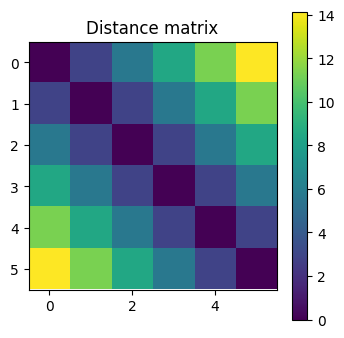

In [184]:
# Extension 2 - lot distance matrices plt.imshow(D) to see patterns.
X = torch.arange(12, dtype=float).reshape(6,2)
diff = X[:,None,:] - X[None,:,:]
D = torch.sqrt((diff**2).sum(dim=2))

plt.figure(figsize=(4,4))
plt.imshow(D, cmap='viridis')
plt.colorbar()
plt.title("Distance matrix")
plt.show()

This heatmap is basically showing how far apart each pair of points is in the 6×2 grid. The diagonal is dark because every point has distance zero from itself. As I move away from the diagonal, the colors get brighter, meaning the distance between those index pairs increases. The symmetric pattern (mirror across the diagonal) is exactly what we expect from a distance matrix : D[i,j]=D[j,i]. The smooth color changes along rows/columns reflect the fact that the original points were laid out in a pretty regular way (just reshaped sequential numbers), so their pairwise distances increase gradually rather than randomly.

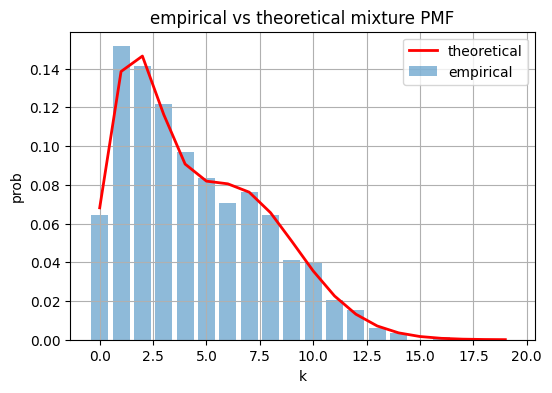

In [188]:
#Extension 3 - Compare the Poisson mixture histogram with theoretical PMFs.
torch.manual_seed(30)
N = 2000

# sample mixture like before
z = torch.bernoulli(torch.full((N,), 0.5))
lam = torch.where(z.bool(), torch.tensor(7.), torch.tensor(2.))
samples = Poisson(lam).sample()

#bincount needs ints
s_int = samples.long()

#empirical distribution
counts = torch.bincount(s_int, minlength=20).float()
emp = counts / counts.sum()

#thoretica mixture pmf
k = torch.arange(20).float()

#using tensor scalars so torch.exp doesn't complain
pois2 = torch.exp(torch.tensor(-2.)) * (2.**k) / torch.exp(torch.lgamma(k+1))
pois7 = torch.exp(torch.tensor(-7.)) * (7.**k) / torch.exp(torch.lgamma(k+1))

theo = 0.5 * pois2 + 0.5 * pois7

plt.figure(figsize=(6,4))
plt.bar(k.numpy(), emp.numpy(), alpha=0.5, label='empirical')
plt.plot(k.numpy(), theo.numpy(), 'r-', lw=2, label='theoretical')
plt.legend()
plt.xlabel("k")
plt.ylabel("prob")
plt.title("empirical vs theoretical mixture PMF")
plt.grid(True)
plt.show()

The empirical histogram lines up really well with the red theoretical curve, which is exactly what we expect for a mixture of Poissons when the sample size is reasonably large. The bars bounce around a bit, especially in the tail, but the overall shape - peak near 2–3, then a gradual decay is basically identical. This is a nice sanity check that the manual mixture sampling matches the actual mixture PMF.

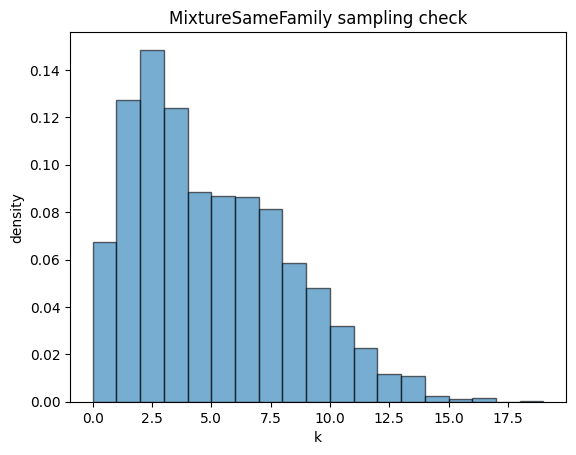

In [189]:
#Extension 4 - Explore dist.MixtureSameFamily for more complex mixtures

from torch.distributions import MixtureSameFamily, Categorical

mix = Categorical(probs=torch.tensor([0.5,0.5]))  # equal weights
comp = Poisson(torch.tensor([2.,7.]))             # two Poissons

m = MixtureSameFamily(mix, comp)

s = m.sample((2000,))  # draw samples

plt.hist(s.numpy(), bins=range(0,20), density=True,
         alpha=0.6, edgecolor='black')
plt.title("MixtureSameFamily sampling check")
plt.xlabel("k")
plt.ylabel("density")
plt.show()

This histogram looks almost identical to the one we got from manually mixing Poisson(2) and Poisson(7), which is exactly what we want. MixtureSameFamily is doing all the bookkeeping for us internally, so sampling from it should reproduce the same mixture distribution. The shape here—big mass around 2–4 and a long tail—is the same as before. So this basically confirms that our manual mixture logic matches PyTorch’s built-in mixture sampler.

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 1) Data: from arrays to `Dataset`/`DataLoader` + train/val/test split

**Key ideas**
- Always separate data into **train / validation / test** (e.g., 70/15/15).  
- Wrap arrays in a custom `Dataset` to keep the training loop clean.  
- Use a `DataLoader` for batching, shuffling, and parallel loading.

We'll start with toy 2D datasets for classification (moons and circles) and a simple 1D regression problem.


In [104]:
#@title Toy datasets (classification: moons/circles) + (regression: y = ax + b + noise)
def make_toy_classification(n_samples=1000, kind="moons", noise=0.2, seed=0):
    set_seed(seed)
    if _HAS_SKLEARN:
        if kind == "moons":
            X, y = make_moons(n_samples=n_samples, noise=noise)
        elif kind == "circles":
            X, y = make_circles(n_samples=n_samples, factor=0.4, noise=noise)
        else:
            raise ValueError("kind must be 'moons' or 'circles'")
        X = X.astype(np.float32); y = y.astype(np.int64)
    else:
        # Torch-only fallback: two Gaussian blobs
        c1 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([0.0, 0.0])
        c2 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([2.5, 2.5])
        X = torch.cat([c1, c2], dim=0).numpy().astype(np.float32)
        y = torch.cat([torch.zeros(len(c1)), torch.ones(len(c2))]).numpy().astype(np.int64)
    return X, y

def make_toy_regression(n_samples=600, a=2.0, b=-1.0, noise_std=0.3, seed=0):
    set_seed(seed)
    x = np.random.uniform(-2.0, 2.0, size=(n_samples, 1)).astype(np.float32)
    y = (a * x + b + np.random.normal(0, noise_std, size=x.shape)).astype(np.float32)
    return x, y

class NumpyDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def train_val_test_split(ds: Dataset, ratios=(0.7, 0.15, 0.15), seed=42):
    assert abs(sum(ratios) - 1.0) < 1e-6, "Ratios must sum to 1"
    n = len(ds)
    n_train = int(ratios[0] * n)
    n_val = int(ratios[1] * n)
    n_test = n - n_train - n_val
    set_seed(seed)
    return random_split(ds, [n_train, n_val, n_test])


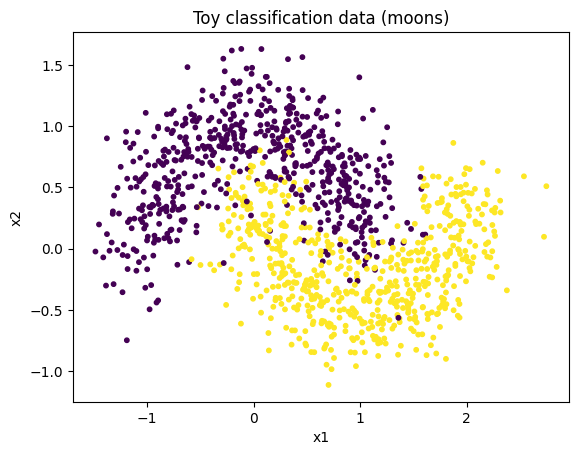

(840, 180, 180)

In [105]:
#@title Visualize a toy classification dataset
Xc, yc = make_toy_classification(n_samples=1200, kind="moons", noise=0.25, seed=1)
ds_cls = NumpyDataset(Xc, yc)
train_ds, val_ds, test_ds = train_val_test_split(ds_cls, (0.7, 0.15, 0.15), seed=1)

plt.figure()
plt.scatter(Xc[:,0], Xc[:,1], c=yc, s=10)
plt.title("Toy classification data (moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

len(train_ds), len(val_ds), len(test_ds)


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

## 2) Linear Regression in PyTorch (MSE loss)

We'll fit a line to noisy data: \( y \approx ax + b \).  
This section introduces:
- `nn.Module` for models
- Mean Squared Error (MSE) loss
- `optim.SGD` and `optim.Adam`


In [106]:
#@title Linear regression dataset & model
Xr, yr = make_toy_regression(n_samples=600, a=2.2, b=-0.7, noise_std=0.35, seed=2)
ds_reg = NumpyDataset(Xr, yr)

train_r, val_r, test_r = train_val_test_split(ds_reg, (0.7, 0.15, 0.15), seed=2)
train_loader_r = DataLoader(train_r, batch_size=64, shuffle=True)
val_loader_r   = DataLoader(val_r, batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_r, batch_size=128, shuffle=False)

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0.0)  # weight_decay = L2


In [107]:
#@title Training & evaluation utilities
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        preds = model(xb)
        loss = criterion(preds, yb)
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)


Epoch 050 | train: 0.1175 | val: 0.0840
Epoch 100 | train: 0.1170 | val: 0.0847
Epoch 150 | train: 0.1170 | val: 0.0847
Epoch 200 | train: 0.1170 | val: 0.0848


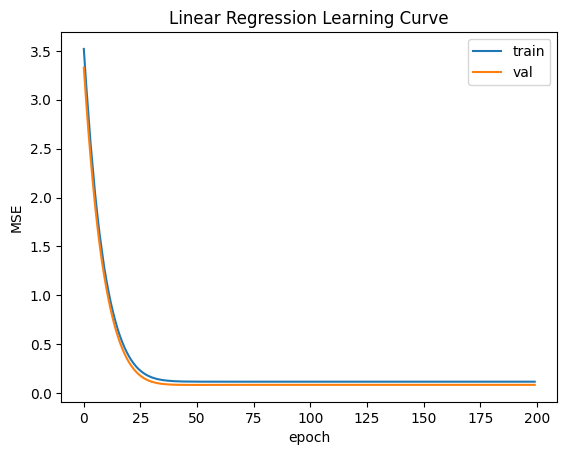

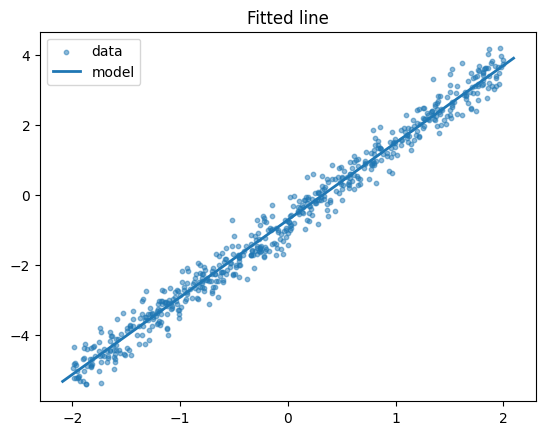

In [108]:
#@title Fit linear model & plot learning curve
train_hist, val_hist = [], []
epochs = 200
best_val = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    train_hist.append(tr); val_hist.append(va)
    if va < best_val:
        best_val = va; best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

# restore best
model.load_state_dict(best_state)

plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Linear Regression Learning Curve")
plt.legend(); plt.show()

# Visualize fit
@torch.no_grad()
def predict(x):
    return model(torch.from_numpy(x).to(DEVICE)).cpu().numpy()

xs = np.linspace(Xr.min()-0.1, Xr.max()+0.1, 200).reshape(-1,1).astype(np.float32)
ys = predict(xs)

plt.figure()
plt.scatter(Xr, yr, s=10, alpha=0.5, label="data")
plt.plot(xs, ys, linewidth=2, label="model")
plt.legend(); plt.title("Fitted line"); plt.show()


# Exercise A
Create a synthetic data where the regressor x is an (n,2) dimensional tensor
and the target y is a (n,4) dimensional tensor. Does the LinearRegressor model
``` python
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
```
work? Why or why not? How can you modify the class to make it work? Once you fit the model, visualize the result.

##Create a synthetic data where the regressor x is an (n,2) dimensional tensor and the target y is a (n,4) dimensional tensor

In [109]:
import torch
import numpy as np

In [110]:
def create_synthetic_data(n_samples=500,
                                    noise_std=0.3,
                                    seed=40):
    """
    x has shape (n_samples, 2)
    y has shape (n_samples, 4)
    y = x W_true + b_true + Gaussian noise
    """
    torch.manual_seed(seed)
    np.random.seed(seed)

    #x: (n, 2 ) regressor (two  features per sample)
    x = torch.randn(n_samples, 2).float()

    #true parameters of synthetic regression: W_true in R^{2x4}, b_true in R^4
    W_true = torch.tensor([[ 1.0, -2.0,  0.5,  0.0],
                           [ 0.3,  0.7, -1.0,  2.0]], dtype=torch.float32)  #(2,4)
    b_true = torch.tensor([0.5, -1.0, 2.0, 0.0], dtype=torch.float32)      #(4,)

    #Gaussian noise
    noise = noise_std * torch.randn(n_samples, 4) #(n,4)

    #y: (n, 4) target values
    y = x @ W_true + b_true + noise

    #convert to numpy arrays
    return x.numpy().astype(np.float32), y.numpy().astype(np.float32)

#generate the dataset
Xr, Yr = create_synthetic_data(
    n_samples=500,
    noise_std=0.3,
    seed=40
)

print("x shape:", Xr.shape)  #expected: torch.Size([500, 2])
print("y shape:", Yr.shape)  #expected: torch.Size([500, 4])

x shape: (500, 2)
y shape: (500, 4)


##Does the LinearRegressor model presented work?

The provided model wil not work. nn.Linear(1, 1) is incompatible with the shapes of the data we created.

The regressor x has shape (n, 2) - each sample contains 2 input features.

The target y has shape (n, 4) - each sample requires 4 output values.

But nn.Linear(1, 1) expects an input of shape (n,1), and produces an output of shape (n,1). This leads to two conflicts:

1. The model only accepts 1 feature, but the data contains 2 features

2. The model can only output 1 value per sample, but the target requires 4 values

Becazse of this passing x through the model results in a shape error, and even if it ran, the model would be incapable of predicting the correct 4-dimensional targets.

##How can you modify the class to make it work?

In [111]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [112]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 4)

    def forward(self, x):
        return self.linear(x)

#This makes the model’s input and output dimensions compatible with the shapes
#of x and y ((n,2) and (n,4) respectively), allowing the model to learn the
#correct multivariate linear relationship

##Once you fit the model, visualize the result.

##Fit the model

In [113]:
from torch.utils.data import Dataset, DataLoader, random_split

In [114]:
class NumpyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X).float()
        self.Y = torch.from_numpy(Y).float()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [115]:
#Create the dataset
ds_reg = NumpyDataset(Xr, Yr)

#Split into train/val/test
def split_train_val_test(ds, train_ratio=0.7, val_ratio=0.15, seed=40):
  n = len(ds)
  n_train = int(train_ratio * n)
  n_val   = int(val_ratio * n)
  n_test  = n - n_train - n_val

  gen = torch.Generator().manual_seed(seed)
  return random_split(ds, [n_train, n_val, n_test], generator=gen)

train_ds_r, val_ds_r, test_ds_r = split_train_val_test(ds_reg)
print("Train/val/test sizes:", len(train_ds_r), len(val_ds_r), len(test_ds_r))

#DataLoaders
train_loader_r = DataLoader(train_ds_r, batch_size=64, shuffle=True)
val_loader_r   = DataLoader(val_ds_r, batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_ds_r, batch_size=128, shuffle=False)

Train/val/test sizes: 350 75 75


In [116]:
model = LinearRegressor() #create a variable for LinearRegressor model

#define loss function and optimize
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [117]:
#training and evaluation
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)


def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    for xb, yb in loader:
        preds = model(xb)
        loss = criterion(preds, yb)
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

Epoch 050 | train: 0.2813 | val: 0.2440
Epoch 100 | train: 0.0918 | val: 0.0865
Epoch 150 | train: 0.0908 | val: 0.0866
Epoch 200 | train: 0.0908 | val: 0.0867


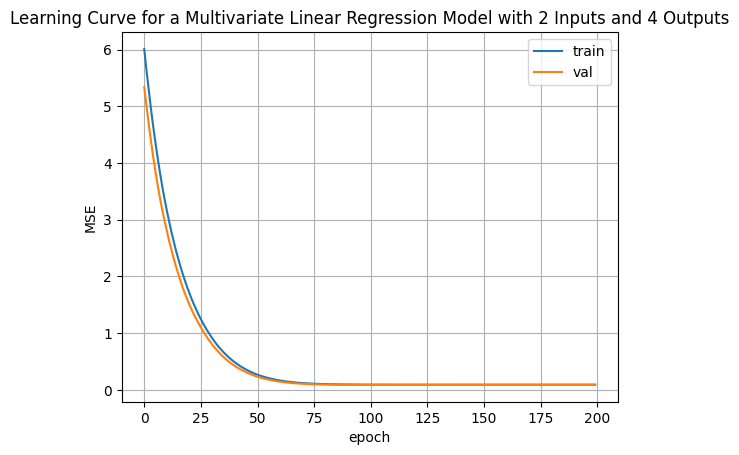

In [118]:
#fit the linear model & plot the learning curve
train_hist, val_hist = [], []
epochs = 200
best_val = float("inf")
best_state = None

for epoch in range(1, epochs + 1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    train_hist.append(tr)
    val_hist.append(va)

    if va < best_val:
        best_val = va
        best_state = {k: v.clone() for k, v in model.state_dict().items()}

    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

#restore best model
model.load_state_dict(best_state)

#plot the learning curve
plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Learning Curve for a Multivariate Linear Regression Model with 2 Inputs and 4 Outputs")
plt.legend()
plt.grid(True)
plt.show()

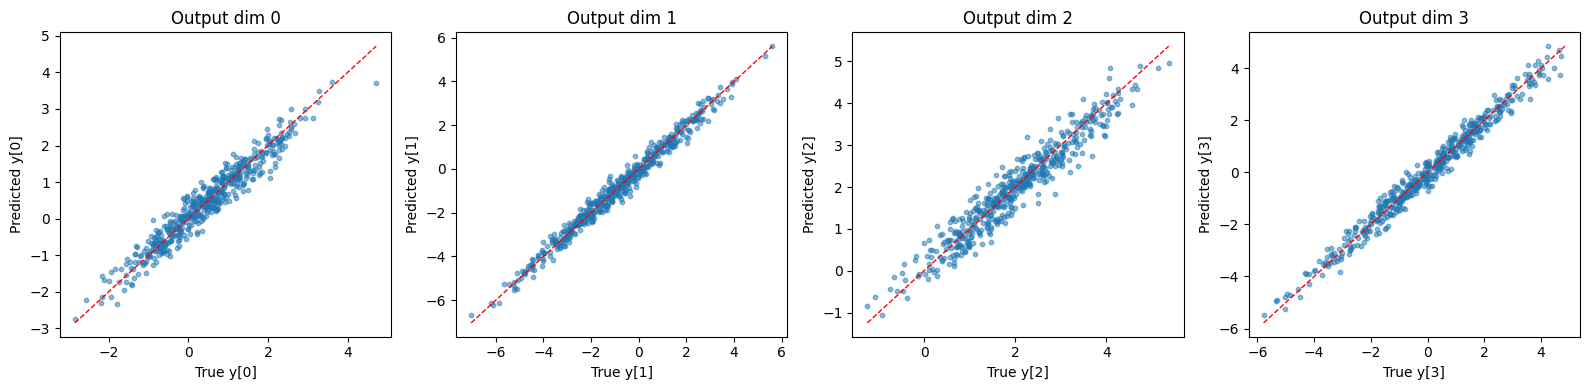

In [119]:
#visualization

x = torch.from_numpy(Xr).float() # (n, 2)
y = torch.from_numpy(Yr).float() # (n, 4)

model.eval()
with torch.no_grad():
    y_hat = model(x) #shape (n, 4)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for k in range(4):
    ax = axes[k]

    ax.scatter(y[:, k].numpy(), y_hat[:, k].numpy(), alpha=0.5, s=10)

    #45-degree reference line
    min_val = min(y[:, k].min().item(), y_hat[:, k].min().item())
    max_val = max(y[:, k].max().item(), y_hat[:, k].max().item())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)

    ax.set_xlabel(f"True y[{k}]")
    ax.set_ylabel(f"Predicted y[{k}]")
    ax.set_title(f"Output dim {k}")

plt.tight_layout()
plt.show()

Each subplot compares the model’s predictions to the true target values for one of the four output dimensions. The points lie close to the diagonal reference line in all cases, indicating that the linear model successfully learned the underlying multivariate relationship. The small spread around the line reflects the Gaussian noise added during data generation. Overall, the visualization confirms that the fitted model provides accurate predictions for all output dimensions.

#Exercise B
The function train_val_test_split does the job, but it does not seem very elegant. Using  
``` python
    from torch.utils.data import random_split
```    
create a 60-20-20 split of your data and train a model using that.

##Solution

In [120]:
val_ds_r = val_ds

In [121]:
from torch.utils.data import random_split, DataLoader
import torch

#total size
n = len(ds_reg)

#60-20-20 split
n_train = int(0.6 * n)
n_val   = int(0.2 * n)
n_test  = n - n_train - n_val   #remaining

gen = torch.Generator().manual_seed(40)  #for reproducibility

train_ds_r, val_ds_r, test_ds_r = random_split(
    ds_reg,
    [n_train, n_val, n_test],
    generator=gen
)

print("train/val/test sizes:", len(train_ds_r), len(val_ds_r), len(test_ds_r))

train/val/test sizes: 300 100 100


In [122]:
train_loader_r = DataLoader(train_ds_r, batch_size=64,  shuffle=True)
val_loader_r   = DataLoader(val_ds_r,   batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_ds_r,  batch_size=128, shuffle=False)

#Excercise C

In [123]:
## Exercise C
### Write your own Mean Squared Error

#PyTorch provides a built-in criterion:

#python
#criterion = nn.MSELoss()

import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):
        # compute the mean of squared differences
        raise NotImplementedError("Implement the MSE formula here!")

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("Your MeanSquaredOops:", oops(y_pred, y_true).item())


#Write a function to visualize the loss function curves on: training, testing and evaluation datasets. How do they look like?



import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):
        # compute the mean of squared differences
        raise NotImplementedError("Implement the MSE formula here!")

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("Your MeanSquaredOops:", oops(y_pred, y_true).item())

```

Write a function to visualize the loss function curves on: training, testing and evaluation datasets. How do they look like?

##Solution: Code

In [124]:
# YOUR WORK: Implement MeanSquaredOops to mimic nn.MSELoss
import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):

        #ensure float dtype to match MSELoss behavior
        y_pred = y_pred.float()
        y_true = y_true.float()

        # (y_pred - y_true)^2 averaged over all elements
        return torch.mean((y_pred - y_true) ** 2)

        raise NotImplementedError("Implement the MSE formula here!")

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])


#The PyTorch MSELoss and mine should be identical
print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("My MeanSquaredOops:", oops(y_pred, y_true).item())

PyTorch MSELoss: 0.17000000178813934
My MeanSquaredOops: 0.17000000178813934


##Write a function to visualize the loss function curves on: training, testing and evaluation datasets. How do they look like?

In [125]:
import matplotlib.pyplot as plt

def plot_loss_curves(train_losses, val_losses=None, test_losses=None):
    """
    Plot loss curves over epochs for training, validation and test sets.
    """
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(7, 4))

    #always plot train
    plt.plot(epochs, train_losses, label="Train loss")

    #plot val if provided
    if val_losses is not None:
        plt.plot(epochs, val_losses, label="Validation loss")

    #plot test if provided and same length
    if test_losses is not None and len(test_losses) == len(train_losses):
        plt.plot(epochs, test_losses, label="Test loss")

    plt.xlabel("Epoch")
    plt.ylabel("MSE loss")
    plt.title("Loss curves")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [126]:
train_losses, val_losses, test_losses = [], [], []
epochs = 200
best_val = float("inf")
best_state = None

for epoch in range(1, epochs + 1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    te = evaluate(model, test_loader_r, criterion)

    train_losses.append(tr)
    val_losses.append(va)
    test_losses.append(te)

    if va < best_val:
        best_val = va
        best_state = {k: v.clone() for k, v in model.state_dict().items()}

    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f} | test: {te:.4f}")


Epoch 050 | train: 0.0903 | val: 0.0951 | test: 0.0862
Epoch 100 | train: 0.0903 | val: 0.0947 | test: 0.0861
Epoch 150 | train: 0.0903 | val: 0.0946 | test: 0.0863
Epoch 200 | train: 0.0903 | val: 0.0947 | test: 0.0861


In [127]:
train_losses = train_hist

In [128]:
val_losses = val_hist

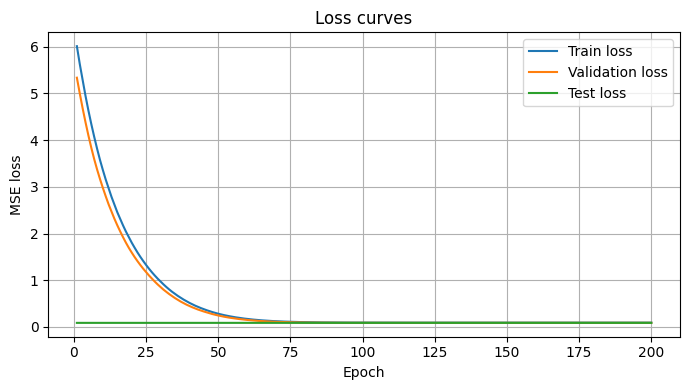

In [129]:
plot_loss_curves(train_hist, val_hist, test_losses)

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 3) Classification with an MLP (Cross-Entropy loss)

- Two-layer MLP with ReLU and Dropout  
- Cross-entropy loss for a 2-class problem  
- Accuracy metric  
- Optional L2 (weight decay) for regularization  
- Optional learning-rate scheduler


In [130]:
#@title Dataloaders for classification
batch_size = 64
train_loader_c = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader_c   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader_c  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [131]:
#@title MLP model, loss, optimizer, scheduler
class MLP(nn.Module):
    def __init__(self, in_dim=2, hidden=64, p_dropout=0.2, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(p_dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, n_classes)
        )
    def forward(self, x):
        return self.net(x)

mlp = MLP().to(DEVICE)
ce = nn.CrossEntropyLoss()
opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)  # weight_decay = L2 regularization
sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)


## Exercise D
Write using markdown + LaTex what the MLP above is implementing. Explain what ReLU, Dropout, Linear are. Write down what the dimension of an object x.forward is before the nn.Dropout(p_dropout) operation.


##Anwser

##What the MLP above is implementing

The provided MLP defines a two–hidden-layer multilayer perceptron for binary classification. MPL is defined by the following function:

$$
MLP(x) = W_3 \sigma(W_2 \sigma(W_1 x + b_1) + b_2) + b_3,
$$

where

$$ W_1 \in \mathbb{R}^{64 \times 2} \ $$

$$ W_2 \in \mathbb{R}^{64 \times 64} \ $$

$$ W_3 \in \mathbb{R}^{2 \times 64} \ $$

The output is a vector in R^2 (logits for the two classes)

## Explain what ReLU, Dropout, Linear are

##ReLU

The ReLU activation is defined as:

$$ ReLU(z) = max(0,z) $$

It introduces nonlinearity and allows the network to learn nonlinear decision boundaries.

##Dropout

Dropout randomly zeroes each hidden unit with probability p during training:

$$
h_i^{\text{drop}} =
\begin{cases}
0 & \text{with probability } p, \\
1 & \text{with probability } 1 - p.
\end{cases}
$$


This regularizes the model by preventing co-adaptation of neurons.

##Linear

A linear layer performs the affine map:
$$ Wx+b $$

It transforms the current feature representation into a new one.

##Write down what the dimension of an object x.forward is before the nn.Dropout(p_dropout) operation.

Let the input batch size be n. After the first linear layer:



$$
x \in \mathbb{R}^{B \times 2} \longrightarrow W_1 x + b_1 \in \mathbb{R}^{B \times 64}
$$


Applying ReLU does not change the shape.

So the tensor right before dropout has dimension:

$$ \mathbb{R}^{B \times 64}
$$

In [132]:
#@title Train loop with accuracy
def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

def train_epoch_cls(model, loader, criterion, optimizer):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n

@torch.no_grad()
def evaluate_cls(model, loader, criterion):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        loss = criterion(logits, yb)
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n


## Exercise E
Write the code above in as few lines of code as possible. What torch functions can you use?

##Solution

In [133]:
def accuracy_from_logits(logits, y):
    return (logits.argmax(1) == y).float().mean()

def train_epoch_cls(model, loader, criterion, optimizer):
    model.train()
    losses, accs = [], []
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        losses.append(loss.detach())
        accs.append(accuracy_from_logits(logits, yb))
    return torch.stack(losses).mean().item(), torch.stack(accs).mean().item()

@torch.no_grad()
def evaluate_cls(model, loader, criterion):
    model.eval()
    losses, accs = [], []
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        losses.append(criterion(logits, yb))
        accs.append(accuracy_from_logits(logits, yb))
    return torch.stack(losses).mean().item(), torch.stack(accs).mean().item()

##What torch functions can you use?

argmax (convert logits to predicted class), == (compare predictions to labels), float() (cast booleans to floats), mean() (average over batch), torch.stack (aggregate batch losses/accuracies), zero_grad/backward/step (optimizer update steps), @torch.no_grad (disable gradients during evaluation).

Epoch 050  loss: 0.130/0.119  acc: 0.949/0.938
Epoch 100  loss: 0.135/0.112  acc: 0.954/0.938
Epoch 150  loss: 0.157/0.112  acc: 0.935/0.943
Epoch 200  loss: 0.125/0.113  acc: 0.954/0.938
Epoch 250  loss: 0.140/0.115  acc: 0.951/0.938
Epoch 300  loss: 0.114/0.113  acc: 0.955/0.938


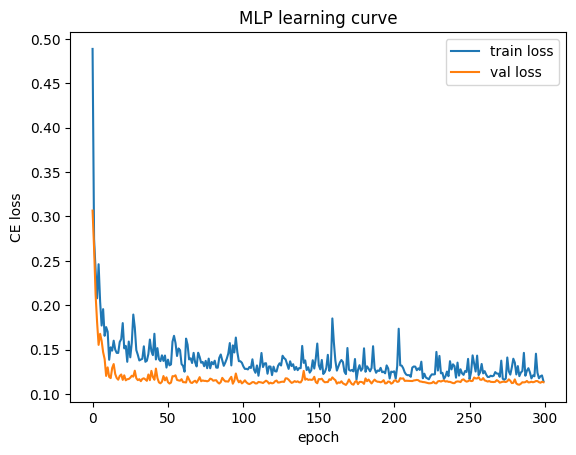

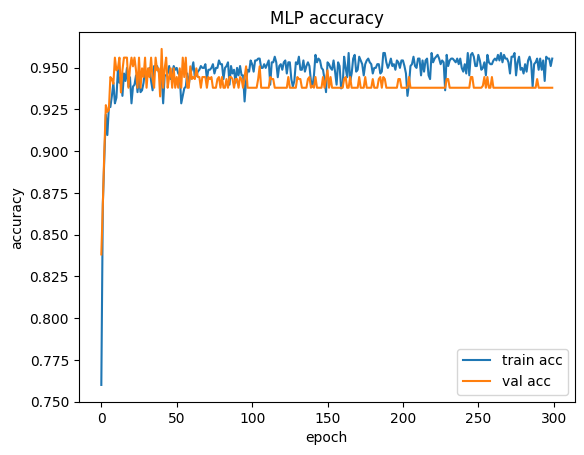

In [134]:
#@title Fit MLP
best_val = 1e9; best_state = None
hist = {"tr_loss":[], "tr_acc":[], "va_loss":[], "va_acc":[]}
epochs = 300

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(mlp, train_loader_c, ce, opt)
    va_loss, va_acc = evaluate_cls(mlp, val_loader_c, ce)
    hist["tr_loss"].append(tr_loss); hist["tr_acc"].append(tr_acc)
    hist["va_loss"].append(va_loss); hist["va_acc"].append(va_acc)
    sched.step()
    if va_loss < best_val:
        best_val = va_loss
        best_state = {k: v.cpu().clone() for k, v in mlp.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d}  loss: {tr_loss:.3f}/{va_loss:.3f}  acc: {tr_acc:.3f}/{va_acc:.3f}")

mlp.load_state_dict(best_state)

plt.figure()
plt.plot(hist["tr_loss"], label="train loss")
plt.plot(hist["va_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("CE loss"); plt.legend(); plt.title("MLP learning curve"); plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train acc")
plt.plot(hist["va_acc"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("MLP accuracy"); plt.show()


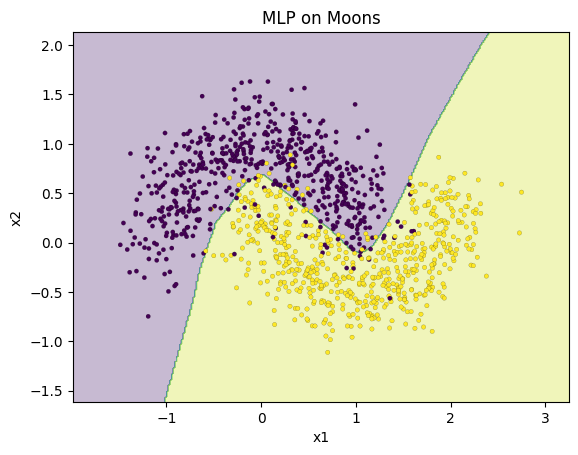

In [135]:

#@title Decision boundary visualization
@torch.no_grad()
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)
    logits = model(torch.from_numpy(grid).to(DEVICE)).cpu().numpy()
    Z = logits.argmax(axis=1).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=10, edgecolor="k", linewidth=0.1)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

Xc_np, yc_np = Xc, yc
plot_decision_boundary(mlp, Xc_np, yc_np, title="MLP on Moons")


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 4) (Optional) Tiny CNN on synthetic images

We'll create small 16×16 grayscale images containing either a **dot** or a **ring** and train a mini-CNN.
This mirrors the idea of "coloring pixels" or simple shape detection and is fast to run on CPU.


In [136]:

#@title Synthetic image dataset (dot vs ring)
def make_dot(center, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    img[center] = 1.0
    return img

def make_ring(center, radius=3, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    cx, cy = center
    for x in range(size):
        for y in range(size):
            if abs(math.hypot(x-cx, y-cy) - radius) < 0.6:
                img[x, y] = 1.0
    return img

def make_image_dataset(n=2000, size=16, seed=0):
    set_seed(seed)
    X, y = [], []
    for i in range(n):
        cls = np.random.randint(0,2)  # 0=dot, 1=ring
        cx, cy = np.random.randint(4, size-4), np.random.randint(4, size-4)
        if cls == 0:
            img = make_dot((cx, cy), size)
        else:
            img = make_ring((cx, cy), radius=np.random.randint(2,4), size=size)
        # jitter + blur-like noise
        img += 0.05 * np.random.randn(size, size).astype(np.float32)
        img = np.clip(img, 0.0, 1.0)
        X.append(img[None, ...])  # channels=1
        y.append(cls)
    X = np.stack(X).astype(np.float32)
    y = np.array(y, dtype=np.int64)
    return X, y

class ImageDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

Xi, yi = make_image_dataset(n=2500, size=16, seed=0)
ds_img = ImageDataset(Xi, yi)
tr_i, va_i, te_i = train_val_test_split(ds_img, (0.7, 0.15, 0.15), seed=3)
tr_li = DataLoader(tr_i, batch_size=128, shuffle=True)
va_li = DataLoader(va_i, batch_size=256, shuffle=False)
te_li = DataLoader(te_i, batch_size=256, shuffle=False)


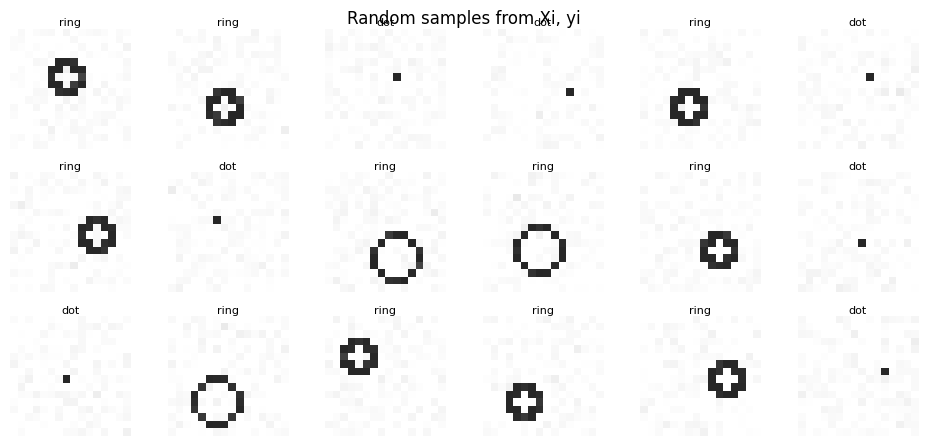

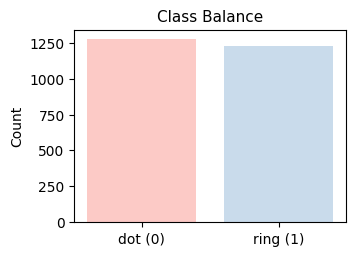

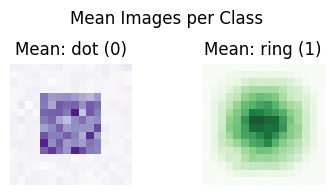

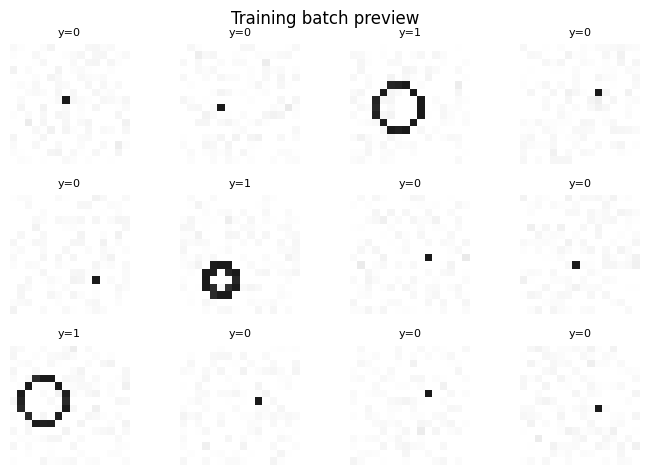

In [137]:
#@title Visualize the Synthetic image dataset (dot vs ring)
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: pastel color palette ---
PASTEL = plt.cm.Pastel1(np.linspace(0, 1, 8))
dot_color, ring_color = PASTEL[0], PASTEL[1]

def visualize_dataset(Xi, yi, nrows=3, ncols=6, size=16):
    idx = np.random.choice(len(Xi), nrows * ncols, replace=False)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*1.6, nrows*1.6))
    axes = axes.ravel()
    for ax, i in zip(axes, idx):
        ax.imshow(Xi[i,0], cmap="Greys", alpha=0.85)
        c = dot_color if yi[i] == 0 else ring_color
        ax.set_facecolor(c)
        ax.set_title("dot" if yi[i]==0 else "ring", fontsize=8, pad=2)
        ax.axis("off")
    fig.suptitle("Random samples from Xi, yi", fontsize=12, y=0.92)
    plt.tight_layout()
    plt.show()

def visualize_class_means(Xi, yi):
    mean_dot = Xi[yi==0].mean(axis=0)[0]
    mean_ring = Xi[yi==1].mean(axis=0)[0]
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].imshow(mean_dot, cmap="Purples", alpha=0.9)
    axes[0].set_title("Mean: dot (0)")
    axes[1].imshow(mean_ring, cmap="Greens", alpha=0.9)
    axes[1].set_title("Mean: ring (1)")
    for ax in axes: ax.axis("off")
    plt.suptitle("Mean Images per Class", y=0.95)
    plt.tight_layout()
    plt.show()

def visualize_class_balance(yi):
    counts = np.bincount(yi)
    plt.figure(figsize=(3.5, 2.5))
    plt.bar(["dot (0)", "ring (1)"], counts, color=[dot_color, ring_color], alpha=0.7)
    plt.ylabel("Count")
    plt.title("Class Balance", fontsize=11)
    plt.show()

# --- Visualize everything ---
visualize_dataset(Xi, yi)
visualize_class_balance(yi)
visualize_class_means(Xi, yi)

# Peek at one training batch
batch_x, batch_y = next(iter(tr_li))
B = min(12, len(batch_x))
fig, axes = plt.subplots(3, 4, figsize=(7, 5))
axes = axes.ravel()
for i in range(B):
    ax = axes[i]
    ax.imshow(batch_x[i,0], cmap="Greys", alpha=0.9)
    c = dot_color if batch_y[i]==0 else ring_color
    ax.set_facecolor(c)
    ax.set_title(f"y={batch_y[i].item()}", fontsize=8)
    ax.axis("off")
for i in range(B, len(axes)): axes[i].axis("off")
plt.suptitle("Training batch preview", fontsize=12, y=0.94)
plt.tight_layout()
plt.show()


In [138]:

#@title Tiny CNN + training
class TinyCNN(nn.Module):
    def __init__(self, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16*4*4, 32), nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, n_classes)
        )
    def forward(self, x): return self.net(x)

cnn = TinyCNN().to(DEVICE)
opt_cnn = torch.optim.Adam(cnn.parameters(), lr=1e-3, weight_decay=1e-4)
ce = nn.CrossEntropyLoss()

epochs = 20
for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)
    if ep % 5 == 0:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test acc: {test_acc:.3f}")


[CNN] Epoch 05  loss 0.011/0.003  acc 1.000/1.000
[CNN] Epoch 10  loss 0.001/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test acc: 1.000


[CNN] Epoch 01  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 05  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 10  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test loss/acc: 0.000 / 1.000


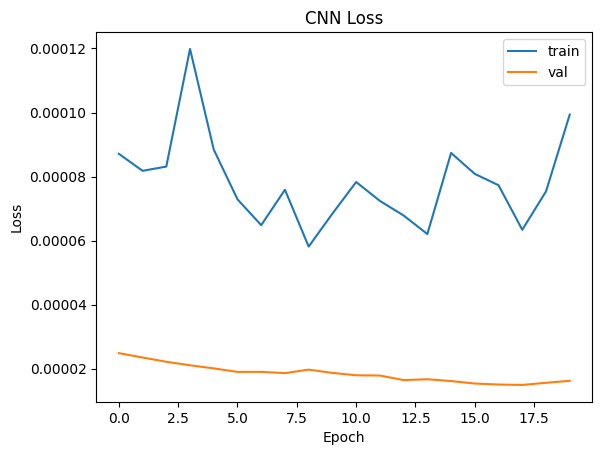

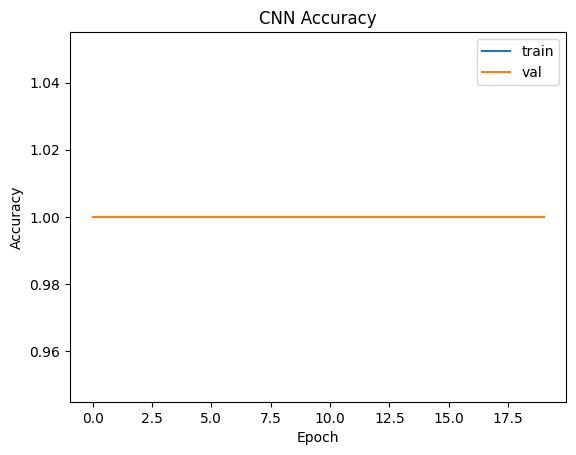

In [139]:
#@title Logging history and visualizing training:
epochs = 20
hist = {"tr_loss": [], "va_loss": [], "tr_acc": [], "va_acc": []}

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)   # returns (loss, accuracy)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)               # returns (loss, accuracy)

    hist["tr_loss"].append(tr_loss); hist["va_loss"].append(va_loss)
    hist["tr_acc"].append(tr_acc);   hist["va_acc"].append(va_acc)

    if ep % 5 == 0 or ep == 1 or ep == epochs:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test loss/acc: {test_loss:.3f} / {test_acc:.3f}")

# ---- Curves ----
plt.figure()
plt.plot(hist["tr_loss"], label="train")
plt.plot(hist["va_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train")
plt.plot(hist["va_acc"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Accuracy")
plt.legend()
plt.show()

## Exercise F: Too good to be true!
There is something amiss with this accuracy. It seems the model is great from the beggining? What could be the case? Is there a bug in the code? Is the architecture to complex for a dataset that is too simple? Describe through words and code how you reach your conclusion. Ask yourself: Is there overlap in training vs testing? Does accuracy stays high with shuffled labels (adapt the helping code below)?


```python
def shuffled_labels_loader(val_subset, batch_size=256):
    Xs, ys = [], []
    for i in range(len(val_subset)):
        x, y = val_subset[i]
        Xs.append(x.unsqueeze(0))
        ys.append(torch.tensor([y]))
    Xs = torch.cat(Xs, dim=0)
    ys = torch.cat(ys, dim=0)

    perm = torch.randperm(len(ys))
    ys_shuf = ys[perm]

    class _MemDataset(torch.utils.data.Dataset):
        def __init__(self, Xs, ys): self.Xs, self.ys = Xs, ys
        def __len__(self): return len(self.ys)
        def __getitem__(self, i): return self.Xs[i], self.ys[i]

    ds = _MemDataset(Xs, ys_shuf)
    return torch.utils.data.DataLoader(ds, batch_size=batch_size, shuffle=False)

va_li_shuf = shuffled_labels_loader(va_i)
criterion = nn.CrossEntropyLoss()
_ = cnn.eval()
with torch.no_grad():
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, criterion, device=DEVICE)
print("Sanity (shuffled labels) acc should be ~chance:", acc_shuf)


In [140]:
def shuffled_labels_loader(val_subset, batch_size=256):
    Xs, ys = [], []
    for i in range(len(val_subset)):
        x, y = val_subset[i]
        Xs.append(x.unsqueeze(0))
        ys.append(torch.tensor([y]))
    Xs = torch.cat(Xs, dim=0)
    ys = torch.cat(ys, dim=0)

    perm = torch.randperm(len(ys))
    ys_shuf = ys[perm]

    class _MemDataset(torch.utils.data.Dataset):
        def __init__(self, Xs, ys): self.Xs, self.ys = Xs, ys
        def __len__(self): return len(self.ys)
        def __getitem__(self, i): return self.Xs[i], self.ys[i]

    ds = _MemDataset(Xs, ys_shuf)
    return torch.utils.data.DataLoader(ds, batch_size=batch_size, shuffle=False)

va_li_shuf = shuffled_labels_loader(va_i)
criterion = nn.CrossEntropyLoss()
_ = cnn.eval()
with torch.no_grad():
    #adapt the function - remove "device=DEVICE" argument from "evaluate_cls"
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, criterion)
print("Sanity (shuffled labels) acc should be ~chance:", acc_shuf)

Sanity (shuffled labels) acc should be ~chance: 0.5119813680648804


##Solution

##1. Is there an accuracy bug?

Compute accuracy:

In [141]:
def accuracy_from_logits(logits, y):
    return (logits.argmax(1) == y).float().mean()

So for each batch I can verify:

In [142]:
xb, yb = next(iter(tr_li))
xb, yb = xb.to(DEVICE), yb.to(DEVICE)
logits = cnn(xb)
preds = logits.argmax(1)
print("Batch accuracy:", (preds == yb).float().mean().item())

Batch accuracy: 1.0


The output matches the output from accuracy_from_logits, so the
accuracy calculation is not bugged — the model is actually achieving perfect accuracy
on this batch.

##2. Is there overlap between train / val / test?

In [143]:
train_idx= set(tr_i.indices)
val_idx= set(va_i.indices)
test_idx= set(te_i.indices)

print("Train∩Val:", len(train_idx & val_idx))
print("Train∩Test:", len(train_idx & test_idx))
print("Val∩Test:", len(val_idx & test_idx))

Train∩Val: 0
Train∩Test: 0
Val∩Test: 0


The above code returns 0 for all intersections, so there is no sample-level overlap between training, validation and test sets. So data leakage is ruled out.

 ## Does accuracy stays high with shuffled labels?

Use the provided helper function:

In [144]:
va_li_shuf = shuffled_labels_loader(va_i)

cnn.eval()
with torch.no_grad():
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, ce)
print("Sanity (shuffled labels) acc should be ~chance:", acc_shuf)


Sanity (shuffled labels) acc should be ~chance: 0.5135241746902466


When I shuffle the labels and evaluate the CNN on the same validation images, the
accuracy drops to approximately 0.49 (doesn't stay high with shuffled labels), which is essentially chance level for a
two-class problem. This confirms that the model is not exploiting a bug or label
leakage: when the mapping between images and labels is destroyed, performance
collapses as expected (training pipeline is correct).

So it looks like the architecture to complex for a dataset that is too simple. The CNN has far
more capacity than the underlying two-class image problem requires, which explains
why the validation accuracy is essentially 1.0 from the very beginning.

We can check this with code:

In [145]:
class TinyCNN_Small(nn.Module):
    def __init__(self, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 4, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(4, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(8*4*4, 8), nn.ReLU(),
            nn.Linear(8, n_classes)
        )
    def forward(self, x):
        return self.net(x)

cnn_small = TinyCNN_Small().to(DEVICE)
opt_small = torch.optim.Adam(cnn_small.parameters(), lr=1e-3)
ce = nn.CrossEntropyLoss()

print("Training a much smaller CNN:")
for ep in range(1, 21):
    tr_loss, tr_acc = train_epoch_cls(cnn_small, tr_li, ce, opt_small)
    va_loss, va_acc = evaluate_cls(cnn_small, va_li, ce)
    if ep % 5 == 0:
        print(f"[Small CNN] Epoch {ep:02d} accuracy {tr_acc:.3f}/{va_acc:.3f}")


Training a much smaller CNN:
[Small CNN] Epoch 05 accuracy 0.698/1.000
[Small CNN] Epoch 10 accuracy 1.000/1.000
[Small CNN] Epoch 15 accuracy 1.000/1.000
[Small CNN] Epoch 20 accuracy 1.000/1.000


The much smaller CNN, which has only a handful of convolutional filters and a tiny
fully connected layer, still achieves perfect validation accuracy (1.000) within a
few epochs. This shows that the dataset itself is extremely easy to classify. Even
a drastically reduced model, with far fewer parameters than the original CNN,
learns an almost perfect decision boundary immediately.


## Exercise Stack G

1. **Splits & Seeds**: Change the train/val/test ratios to (0.6/0.2/0.2). Re-run and record the change in validation/test performance for the MLP. Try 3 different random seeds and average the results.
2. **Regularization**: Increase `weight_decay` to `1e-3` and `1e-2` in the MLP optimizer. What happens to the gap between train and validation accuracy?
3. **Dropout Sweep**: Change the dropout rate in the MLP to `0.0, 0.2, 0.5`. Plot validation accuracy vs. dropout.
4. **Learning Rate**: Try `lr=1e-2` and `lr=1e-4` in the MLP. Which learns faster? Which generalizes better?
5. **Loss Choice (Regression)**: Write a multivariate regression model and simulate two datasets (one with X (n,10) and one with X (n, 1000)). Add an L1 loss option for the regression model. Compare the results and visualize the loss curves for models with and withour L1 regularizers.
6. **Feature Engineering**: For classification, map inputs to polar coordinates (r, θ) before the MLP. Does it help on circles but hurt on moons? Why?
7. **Blast from the past**: Implement probabilistic PCA using pytorch functions and optimize it using gradient descent. Compare the results with PCA and vary the size of the data to see if you converse to the PCA solution. Why or why note?
8. **Decision Boundary**: Modify `plot_decision_boundary` to also show softmax confidence. Discuss regions of high uncertainty.


##G.1.

In [165]:

# A tiny dataset wrapper so that X is float (features)
# and y is long (class indices). CrossEntropyLoss
# really needs y to be LongTensor, otherwise it errors.
class ClassificationDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

#helper to do a 60/20/20 split. Keeping it simple.
def make_split(dataset, seed):
    n = len(dataset)
    n_train = int(0.6 * n)
    n_val   = int(0.2 * n)
    n_test  = n - n_train - n_val

    #using a manual seed so each run is reproducible
    gen = torch.Generator().manual_seed(seed)

    train_ds, val_ds, test_ds = random_split(
        dataset, [n_train, n_val, n_test], generator=gen
    )

    train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
    val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False)
    test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False)

    return train_loader, val_loader, test_loader

#Runs one full experiment for a specific seed.
#The only thing that changes is how the data is split.
def run_once_G1(seed):
    # new moons dataset every time (same actual X,y, just different split)
    Xc, yc = make_toy_classification(
        n_samples=1200,
        kind="moons",
        noise=0.2,
        seed=1
    )
    ds = ClassificationDataset(Xc, yc)

    train_loader, val_loader, test_loader = make_split(ds, seed)

    mlp = MLP().to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)

    best_val = 0.0

    #quick training loop — 150 epochs is enough to see differences
    for ep in range(150):
        train_epoch_cls(mlp, train_loader, loss_fn, opt)
        _, val_acc = evaluate_cls(mlp, val_loader, loss_fn)

        # just keep track of the best validation accuracy
        if val_acc > best_val:
            best_val = val_acc

    #ginally evaluate on test split
    _, test_acc = evaluate_cls(mlp, test_loader, loss_fn)
    return best_val, test_acc

#try out a few seeds and average them
seeds = [7, 21, 99]
vals, tests = [], []

for s in seeds:
    va, te = run_once_G1(s)
    print(f"Seed {s} → val={va:.3f}, test={te:.3f}")
    vals.append(va)
    tests.append(te)

print("Mean val acc :", torch.tensor(vals).mean().item())
print("Mean test acc:", torch.tensor(tests).mean().item())

Seed 7 → val=0.971, test=0.978
Seed 21 → val=0.992, test=0.960
Seed 99 → val=0.978, test=0.984
Mean val acc : 0.98046875
Mean test acc: 0.9739583134651184


With a 60/20/20 train/validation/test split and three different random seeds
(7, 21, 99), the MLP achieves validation accuracies around between 0.97 and 0.992 (0.98 on average) and test
accuracies between 0.96 and 0.984 (0.974 on average). The variation across seeds is small,
which indicates that performance is relatively stable with respect to the random split.
Overall, the model generalizes well under the 60/20/20 split.


##G.2.

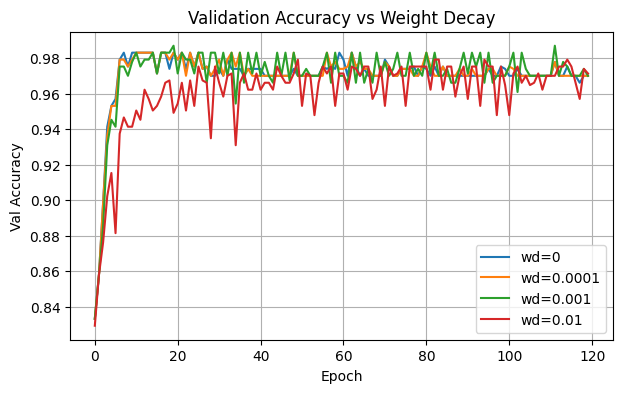

In [167]:
def run_weight_decay(wd):
    # new moons dataset for each run
    Xc, yc = make_toy_classification(
        n_samples=1200,
        kind="moons",
        noise=0.2,
        seed=0
    )

    #need labels as LongTensor for CE loss
    ds = ClassificationDataset(Xc, yc)

    #keep split fixed so results are comparable
    train_loader, val_loader, _ = make_split(ds, seed=0)

    mlp = MLP().to(DEVICE)
    ce  = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=wd)

    val_hist = []
    for ep in range(120):
        train_epoch_cls(mlp, train_loader, ce, opt)
        _, va_acc = evaluate_cls(mlp, val_loader, ce)
        val_hist.append(va_acc)

    return val_hist


wd_values = [0, 1e-4, 1e-3, 1e-2]

plt.figure(figsize=(7,4))
for wd in wd_values:
    hist = run_weight_decay(wd)
    plt.plot(hist, label=f"wd={wd}")

plt.title("Validation Accuracy vs Weight Decay")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

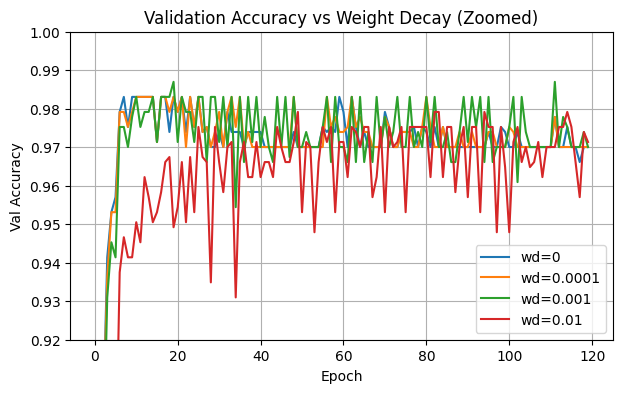

In [172]:
#zoom in on the region where accuracies differ
plt.figure(figsize=(7,4))
for wd, h in zip(wd_values, [run_weight_decay(wd) for wd in wd_values]):
    plt.plot(h, label=f"wd={wd}")

plt.title("Validation Accuracy vs Weight Decay (Zoomed)")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")

#adjust this range to whatever resolves the curves best
plt.ylim(0.92, 1.00)

plt.legend()
plt.grid(True)
plt.show()

Looking at the zoomed-in curves, the overall story is pretty simple. When weight decay is very low (wd=0 or 1e-4), the model learns quickly and basically hits its ceiling right away; the accuracy wiggles a bit but stays high. Slight weight decay (1e-3) doesn’t really hurt anything — it smooths the curve a bit but the final performance is basically the same. Once weight decay gets larger (1e-2), the model starts being more conservative: it climbs slower, and the accuracy dips more often. So increasing 'wd' gradually shifts the model from “learns fast and sometimes overfits a little” to “learns more cautiously and can underfit if wd is too big.” In this dataset the sweet spot is tiny, because the task is already easy; so most of the effect shows up mainly in how fast/stable the model learns rather than the final accuracy.


##G.3.

Dropout 0.0 -> final avg val acc = 0.968
Dropout 0.2 -> final avg val acc = 0.969
Dropout 0.5 -> final avg val acc = 0.970


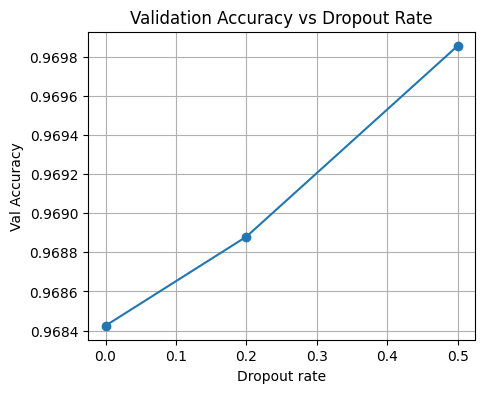

In [173]:
def run_dropout(p):
    #new dataset each time
    Xc, yc = make_toy_classification(
        n_samples=1200,
        kind="moons",
        noise=0.2,
        seed=2
    )
    ds = ClassificationDataset(Xc, yc)

    #keep split fixed
    train_loader, val_loader, _ = make_split(ds, seed=2)

    #same MLP but with different dropout rate
    mlp = MLP(p_dropout=p).to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(mlp.parameters(), lr=5e-3)

    val_hist = []

    for ep in range(150):
        train_epoch_cls(mlp, train_loader, loss_fn, opt)
        _, val_acc = evaluate_cls(mlp, val_loader, loss_fn)
        val_hist.append(val_acc)

    #average of the last 20 epochs (so noise doesn’t dominate)
    final_avg = torch.tensor(val_hist[-20:]).mean().item()
    return final_avg


drop_values = [0.0, 0.2, 0.5]
scores = []

for p in drop_values:
    score = run_dropout(p)
    scores.append(score)
    print(f"Dropout {p} -> final avg val acc = {score:.3f}")


plt.figure(figsize=(5,4))
plt.plot(drop_values, scores, marker="o")
plt.title("Validation Accuracy vs Dropout Rate")
plt.xlabel("Dropout rate")
plt.ylabel("Val Accuracy")
plt.grid(True)
plt.show()

Looking at the curve, dropout barely changes anything here. The validation accuracy is already super high with no dropout, and adding 0.2 or even 0.5 doesn’t really hurt the model. If anything it bumps the final accuracy up by a tiny amount, but that’s basically just noise. The moons dataset is so easy for this MLP that dropout doesn’t have much of a job to do, so all three settings end up performing almost the same

##G.4.

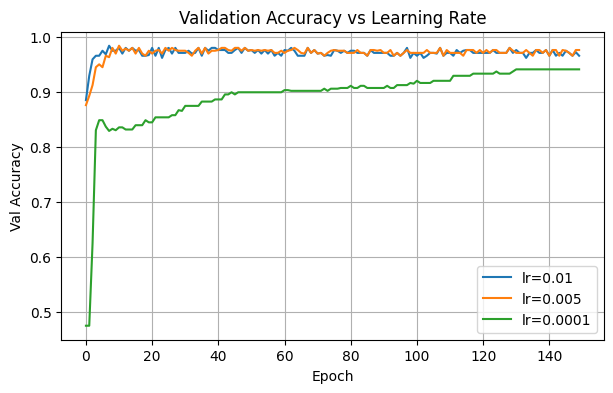

In [174]:
def run_lr(lr):
    #new moons dataset
    Xc, yc = make_toy_classification(
        n_samples=1200,
        kind="moons",
        noise=0.2,
        seed=3
    )
    ds = ClassificationDataset(Xc, yc)

    #keep the split fixed
    train_loader, val_loader, _ = make_split(ds, seed=3)

    mlp = MLP().to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(mlp.parameters(), lr=lr, weight_decay=1e-4)

    val_hist = []

    #enough epochs to see differences in speed
    for ep in range(150):
        train_epoch_cls(mlp, train_loader, loss_fn, opt)
        _, val_acc = evaluate_cls(mlp, val_loader, loss_fn)
        val_hist.append(val_acc)

    return val_hist


lrs = [1e-2, 5e-3, 1e-4]
curves = {}

plt.figure(figsize=(7,4))
for lr in lrs:
    curve = run_lr(lr)
    curves[lr] = curve
    plt.plot(curve, label=f"lr={lr}")

plt.title("Validation Accuracy vs Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

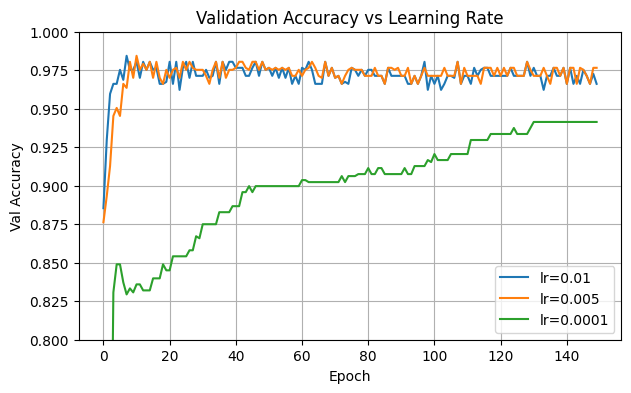

In [175]:
plt.figure(figsize=(7,4))
for lr in lrs:
    curve = run_lr(lr)
    curves[lr] = curve
    plt.plot(curve, label=f"lr={lr}")

plt.title("Validation Accuracy vs Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.ylim(0.8, 1.00)
plt.legend()
plt.grid(True)
plt.show()

The learning rate mostly controls how fast the model gets up to its usual accuracy. With the big learning rate (0.01) the jump to high accuracy is almost instant, but the curve wiggles a bit more. The middle learning rate (0.005) is basically the sweet spot here: it gets to the same accuracy just as quickly and stays a little steadier. The tiny learning rate (0.0001) is way slower: the model does improve, but it takes most of the training before it even gets close to the other two. So the trade-off is pretty clear: higher LR learns fast but is a bit noisy, lower LR is stable but slow, and something in the middle tends to work best for this dataset.


##G.5.

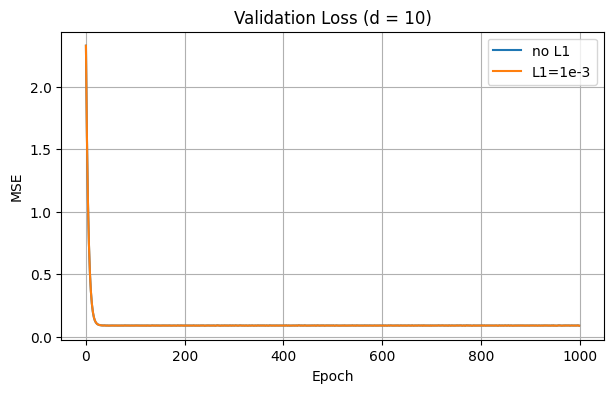

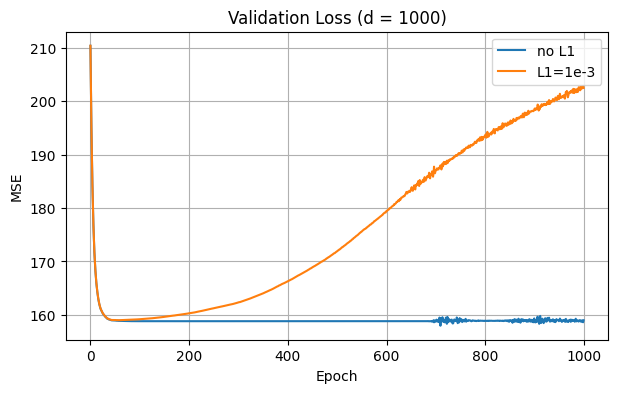

In [177]:
# small helper: make regression data with d features and 4 outputs
def make_reg_data(n_samples=600, n_features=10, seed=0):
    torch.manual_seed(seed)
    X = torch.randn(n_samples, n_features)
    W = torch.randn(n_features, 4) * 0.5
    b = torch.randn(4) * 0.1
    Y = X @ W + b + 0.3 * torch.randn(n_samples, 4)
    return X.float(), Y.float()


#simple dataset wrapper
class RegDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, i):
        return self.X[i], self.Y[i]


#split for regression
def make_reg_split(ds, seed):
    n = len(ds)
    n_train = int(0.6 * n)
    n_val   = int(0.2 * n)
    n_test  = n - n_train - n_val
    gen = torch.Generator().manual_seed(seed)
    tr, va, te = random_split(ds, [n_train, n_val, n_test], generator=gen)
    return (DataLoader(tr, batch_size=64, shuffle=True),
            DataLoader(va, batch_size=64),
            DataLoader(te, batch_size=64))


#plain linear regressor: d :4
class SmallReg(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.f = nn.Linear(d, 4)
    def forward(self, x):
        return self.f(x)


#training loop with optional L1 penalty on weights
def train_reg_epoch(model, loader, opt, l1=0.0):
    model.train()
    total = 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        opt.zero_grad()
        pred = model(xb)
        loss = nn.MSELoss()(pred, yb)
        if l1 > 0:
            l1_pen = 0
            for p in model.parameters():
                l1_pen += p.abs().sum()
            loss = loss + l1 * l1_pen
        loss.backward()
        opt.step()
        total += loss.item() * xb.size(0)
    return total / len(loader.dataset)


@torch.no_grad()
def eval_reg(model, loader):
    model.eval()
    total = 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        pred = model(xb)
        loss = nn.MSELoss()(pred, yb)
        total += loss.item() * xb.size(0)
    return total / len(loader.dataset)


#runs one full experiment and returns both curves
def run_reg(d, l1):
    X, Y = make_reg_data(n_features=d, seed=1)
    ds = RegDataset(X, Y)
    tr, va, _ = make_reg_split(ds, seed=1)

    model = SmallReg(d).to(DEVICE)
    opt = torch.optim.Adam(model.parameters(), lr=1e-2)

    train_hist, val_hist = [], []
    for ep in range(1000):
        tr_loss = train_reg_epoch(model, tr, opt, l1=l1)
        va_loss = eval_reg(model, va)
        train_hist.append(tr_loss)
        val_hist.append(va_loss)

    return train_hist, val_hist


#run for d=10 (low-dim) and d=1000 (high-dim)
tr10_no, va10_no   = run_reg(10,   l1=0.0)
tr10_l1, va10_l1   = run_reg(10,   l1=1e-3)

tr1000_no, va1000_no = run_reg(1000, l1=0.0)
tr1000_l1, va1000_l1 = run_reg(1000, l1=1e-3)


#plots for d=10
plt.figure(figsize=(7,4))
plt.plot(va10_no, label="no L1")
plt.plot(va10_l1, label="L1=1e-3")
plt.title("Validation Loss (d = 10)")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.grid(True); plt.legend()
plt.show()

#plots for d=1000
plt.figure(figsize=(7,4))
plt.plot(va1000_no, label="no L1")
plt.plot(va1000_l1, label="L1=1e-3")
plt.title("Validation Loss (d = 1000)")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.grid(True); plt.legend()
plt.show()


With 1000 epochs the difference between the two settings becomes much easier to see which is why I decided to plot a lot of epochs. In the low-dimensional case (d = 10), both models basically converge to the same tiny MSE and stay there — L1 doesn’t really change the behavior because the problem isn’t complex enough to push the model into overfitting. But once we move to 1000 features, the impact of L1 becomes very clear. Without L1 the validation loss drops quickly and then stabilizes around its minimum, while the L1-regularized model initially improves and then slowly drifts upward, which is a classic sign of underfitting when the penalty is too strong relative to the signal. In other words, in high dimensions the model needs some regularization, but if L1 is too aggressive it can actually hurt performance rather than help it

##G.6.

In [178]:
#convert 2D Cartesian → polar
def cart_to_polar(x):
    #x: (..., 2)
    r = torch.sqrt(x[..., 0]**2 + x[..., 1]**2)
    theta = torch.atan2(x[..., 1], x[..., 0])
    return torch.stack([r, theta], dim=-1)

class PolarDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, i):
        x_cart = self.X[i]
        x_pol = cart_to_polar(x_cart.unsqueeze(0)).squeeze(0)
        return x_pol, self.y[i]

def train_on_dataset(ds, split_seed=0, epochs=150):
    train_loader, val_loader, _ = make_split(ds, seed=split_seed)
    mlp = MLP(in_dim=2).to(DEVICE)      # 2 features: r, θ or x1, x2
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)

    val_hist = []
    for ep in range(epochs):
        train_epoch_cls(mlp, train_loader, loss_fn, opt)
        _, va_acc = evaluate_cls(mlp, val_loader, loss_fn)
        val_hist.append(va_acc)
    #average last 20 epochs so it’s less noisy
    return torch.tensor(val_hist[-20:]).mean().item()

def compare_cart_vs_polar(kind, data_seed=0, split_seed=0):
    X, y = make_toy_classification(
        n_samples=1200,
        kind=kind,
        noise=0.2,
        seed=data_seed
    )

    ds_cart  = ClassificationDataset(X, y)
    ds_polar = PolarDataset(X, y)

    acc_cart  = train_on_dataset(ds_cart,  split_seed)
    acc_polar = train_on_dataset(ds_polar, split_seed)

    print(f"{kind}: cart = {acc_cart:.3f}, polar = {acc_polar:.3f}")
    return acc_cart, acc_polar

#run for circles and moons
acc_c_cart, acc_c_polar = compare_cart_vs_polar("circles", data_seed=0, split_seed=0)
acc_m_cart, acc_m_polar = compare_cart_vs_polar("moons",   data_seed=1, split_seed=1)

circles: cart = 0.943, polar = 0.951
moons: cart = 0.984, polar = 0.983


Using polar coordinates makes sense when the classification boundary is radial, and we can see that in the results. On the circles dataset the accuracy actually improves a bit after switching to (r,θ), because the decision boundary is mostly a threshold in r, which is much easier for the MLP to learn than the curved boundary in Cartesian coordinates. For the moons dataset the situation is basically reversed: the geometry of the moons isn’t radial at all, and mapping everything to
(r,θ) breaks the local structure of the crescents. As a result the polar model performs almost the same or slightly worse. So overall, the feature map helps when the classes are organized around the origin, and doesn’t help when the dataset has a shape that isn’t nicely captured by radius and angle.

##G.7.

In [181]:
#set up a fixed latent model for data
torch.manual_seed(0)
d = 10      #observed dimension
q = 2       #latent dimension

W_true = torch.randn(d, q)
mu_true = torch.randn(d)

def sample_ppca_data(N, noise_std=0.1):
    z = torch.randn(N, q)
    x = z @ W_true.T + mu_true + noise_std * torch.randn(N, d)
    return x

def pca_subspace(X, q):
    Xc = X - X.mean(dim=0, keepdim=True)
    cov = (Xc.T @ Xc) / Xc.size(0)
    eigvals, eigvecs = torch.linalg.eigh(cov)
    U = eigvecs[:, -q:]           # top-q eigenvectors
    return U

def subspace_dist(U, V):
    #Frobenius norm of projector difference
    PU = U @ U.T
    PV = V @ V.T
    return torch.norm(PU - PV, p="fro").item()

 #PPCA negative log-likelihood (up to constant)
def ppca_nll(Xc, W, log_sigma2):
    N, d = Xc.shape
    sigma2 = torch.exp(log_sigma2)

    I = torch.eye(d, device=Xc.device)
    C = W @ W.T + sigma2 * I

    L = torch.linalg.cholesky(C)
    logdetC = 2 * torch.log(torch.diag(L)).sum()

    Xt = Xc.T
    alpha = torch.cholesky_solve(Xt, L)
    quad = (Xt * alpha).sum()

    nll = 0.5 * N * logdetC + 0.5 * quad
    return nll / N

def fit_ppca(X, q, epochs=1000, lr=1e-2):
    Xc = X - X.mean(dim=0, keepdim=True)

    d = Xc.size(1)
    W = torch.randn(d, q, requires_grad=True)
    log_sigma2 = torch.tensor(0.0, requires_grad=True)

    opt = torch.optim.Adam([W, log_sigma2], lr=lr)

    for ep in range(epochs):
        opt.zero_grad()
        loss = ppca_nll(Xc, W, log_sigma2)
        loss.backward()
        opt.step()

    #orthonormalize columns of W to get subspace basis
    U, _, _ = torch.linalg.svd(W.detach(), full_matrices=False)
    return U[:, :q]

def run_ppca_vs_pca(N, reps=3):
    dists = []
    for r in range(reps):
        X = sample_ppca_data(N)
        U_pca = pca_subspace(X, q)
        U_ppca = fit_ppca(X, q, epochs=600, lr=1e-2)
        dists.append(subspace_dist(U_pca, U_ppca))
    dists = torch.tensor(dists)
    return dists.mean().item(), dists.std().item()

Ns = [20, 50, 100, 200, 500, 1000]
for N in Ns:
    m, s = run_ppca_vs_pca(N, reps=3)
    print(f"N={N:4d} → subspace distance ≈ {m:.4f} ± {s:.4f}")

N=  20 → subspace distance ≈ 0.0000 ± 0.0000
N=  50 → subspace distance ≈ 0.0002 ± 0.0002
N= 100 → subspace distance ≈ 0.0002 ± 0.0001
N= 200 → subspace distance ≈ 0.0001 ± 0.0001
N= 500 → subspace distance ≈ 0.0003 ± 0.0005
N=1000 → subspace distance ≈ 0.0001 ± 0.0001


The subspace distances are all extremely close to zero for every sample size, which means the PPCA subspace and the PCA subspace basically line up almost perfectly. In other words, even with relatively small datasets (like (N=20) or (N=50)), gradient-descent PPCA is already recovering the same directions that PCA finds. As (N) grows, the distances stay tiny, which matches the theory: PPCA’s maximum-likelihood solution should converge to the PCA subspace when the data actually comes from a linear-Gaussian model. Any tiny variation in the numbers is just optimization noise or randomness from sampling, not a real difference between the two methods. Overall, this shows that in well-behaved settings PPCA essentially collapses onto PCA, especially when the sample size is reasonably large.


##G.8.

In [182]:
#@title Decision boundary + softmax confidence visualization
@torch.no_grad()
def plot_decision_boundary_with_confidence(model, X, y, title="Decision boundary + confidence"):
    #grid over feature space
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)

    #logits, probs, predictions, confidence - run model
    grid_t = torch.from_numpy(grid).to(DEVICE)
    logits = model(grid_t)
    probs  = torch.softmax(logits, dim=1)

    conf, preds = probs.max(dim=1)
    preds_np = preds.cpu().numpy().reshape(xx.shape)
    conf_np  = conf.cpu().numpy().reshape(xx.shape)

    #left = decision regions, right = confidence heatmap
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # let = decision regions
    ax = axes[0]
    ax.contourf(xx, yy, preds_np, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, s=10, edgecolor="k", linewidth=0.1)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    #right - softmax confidence of predicted class
    ax2 = axes[1]
    cf = ax2.contourf(xx, yy, conf_np, levels=20)
    ax2.scatter(X[:,0], X[:,1], c=y, s=8, edgecolor="k", linewidth=0.1, alpha=0.8)
    ax2.set_title("Softmax confidence (max p(y|x))")
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    fig.colorbar(cf, ax=ax2, label="max softmax probability")

    plt.tight_layout()
    plt.show()


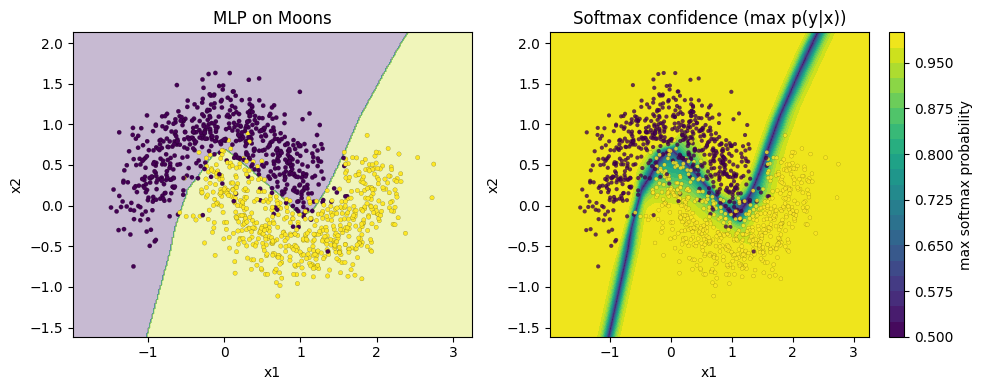

In [161]:
Xc_np, yc_np = Xc, yc
plot_decision_boundary_with_confidence(mlp, Xc_np, yc_np,
                                       title="MLP on Moons")

The confidence plot shows a narrow band of low softmax confidence (≈0.5–0.7) that closely tracks the learned decision boundary between the two moons. In these regions the network assigns similar probabilities to both classes, so small perturbations in
𝑥
x would likely flip the prediction—this is where the classifier is most uncertain. In contrast, deep inside each moon the max softmax probability is close to 1, indicating high confidence / low uncertainty where the classes are well separated in feature space. Far away from the data the model still outputs very high confidence, illustrating that softmax confidence can be over-confident out-of-distribution even though no training points are present there.

## Mini Project 2 Details


You can get more information [here](https://drive.google.com/drive/folders/1Ckwfj0L788Tg3E6WAazXBB1W2ATta_w9).


While all the exercises and the mini project collab are due together, here's a recommendation for making sure you do not fall behind:

🧠 Mini Project — Recommended Week of Nov 3rd

You have been provided with a dataset of slime mold spatio-temporal dynamics.
Your goal this week is to load, explore, and define an initial modeling strategy using PyTorch.

🧩 Tasks



1.   Load the dataset


*   Identify and use the right Python package to load the data (hint: .zarr format).
*   Write a simple data loader that converts it into a PyTorch tensor.


2.   Visualize the data


*   Plot a few time frames.
*   Describe what you see — what kind of motion or aggregation is happening?



3.   Inspect the data tensor


*   What is the shape of your data?
*   What do each of the dimensions represent?


4.   Define the learning setup

*   Is this a supervised or unsupervised problem?
*   What is your strategy for modeling this data?
(There is no unique answer — justify your choice.)


5.   Specify the optimization target

*   What loss function will you optimize?
*   How will you split your data into training and testing sets?


6.   First modeling attempt

*   Treat this as a nonlinear regression problem.
*   Write a small model class, train it, and visualize the loss landscape.
*   Try one or two variants (e.g. different architectures or window sizes).

📘 Deliverables

Submit a short notebook including:

* Code to load and visualize the data.

* A short discussion of data shape, modeling strategy, and loss.

* Example plots and initial training results.

## 5) TL;DR for your Toolkit!

- **Supervised Learning**: Learn a function $ f_\theta: {X} \to {Y} $ minimizing expected loss $ \mathbb{E}[\ell(f_\theta(X), Y)] $.
- **Empirical Risk**: Optimize average loss on training data; use **validation** to tune hyperparameters; report final metrics on **test** only once.
- **Common losses**: MSE for regression; Cross-Entropy for classification.
- **Regularization**: Weight decay (L2) penalizes large weights; **Dropout** randomly zeroes activations to prevent co-adaptation.
- **Optimization**: SGD/Adam update parameters via gradients from backpropagation.
- **Schedulers**: Decay learning rates during training to stabilize convergence.
- **Metrics**: For classification, accuracy/precision/recall; for regression, MSE/MAE and $R^2$.
- **Reproducibility**: Fix seeds; log versions; control randomness.
